# 카메라 스티커앱 만들기





In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

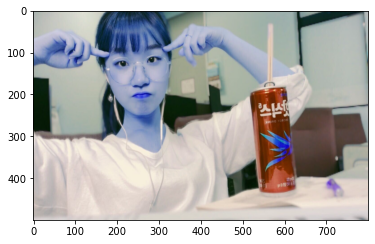

In [2]:
import os

my_image_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/image.JPG'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (800, 500))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

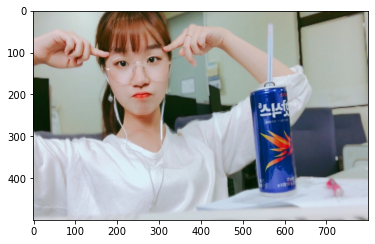

In [3]:
# RGB 이미지로 바꿔줍시다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

In [5]:
dlib_rects = detector_hog(img_rgb, 1)

In [6]:
print(dlib_rects)

rectangles[[(159, 77) (345, 263)]]


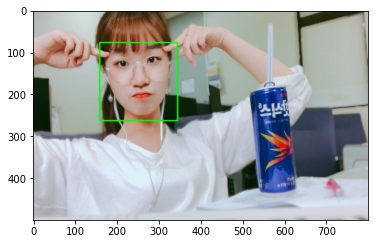

In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("^ㅅ^")

^ㅅ^


In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


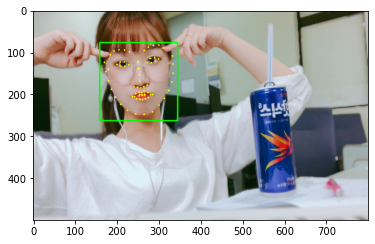

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

고양이 스티커의 위치 

$$x = x_{nose}$$
$$y = y_{nose}$$

스티커의 크기

$$width = height$$

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print("(x, y) : ({}, {})".format(x, y))
    print("(w, h) : ({}, {})".format(w, h))

(257, 185)
(x, y) : (255, 170)
(w, h) : (187, 187)


In [12]:
sticker_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(187, 187, 3)


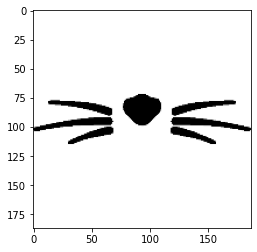

In [13]:
plt.imshow(img_sticker)

In [14]:
refined_x = x - int(w/2) # left
refined_y = y - int(h/2) # top
print("(x, y) : ({}, {})".format(refined_x, refined_y))

(x, y) : (162, 77)


In [15]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(187, 187, 3)


In [16]:
img_sticker.shape

(187, 187, 3)

In [17]:
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

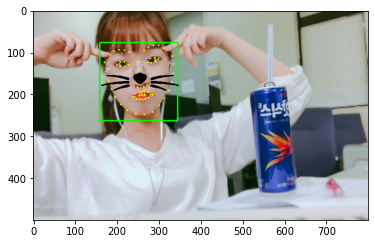

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

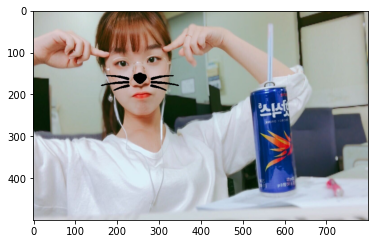

In [19]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()